In [200]:
import sys

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from config import *
from tools import *
from features import *

path_to_dfs = Path('firemen/firepoint/2x2/train/occurence_default/')

name = 'df_train_full_0_all_4_0_risk-size-watershed_node.pkl'

df_test = read_object(name, path_to_dfs)

In [201]:
df_test

,12_mean,12_min,AutoRegressionBin-B-1,Bare soil_max,Chênes décidus_max,Chênes décidus_mean,Conifères_max,Crop_max,Deciduous_min,Douglas_max,...,nbsinister-kmeans-5-Class-Dept-laplace+median-3,nbsinister-kmeans-5-Class-Dept-laplace+median-5,nbsinister-kmeans-5-Class-Dept-max-Specialized,nbsinister-kmeans-5-Class-Dept-max-1,nbsinister-kmeans-5-Class-Dept-max-3,nbsinister-kmeans-5-Class-Dept-max-5,nbsinister-kmeans-5-Class-Dept-sum-Specialized,nbsinister-kmeans-5-Class-Dept-sum-1,nbsinister-kmeans-5-Class-Dept-sum-3,nbsinister-kmeans-5-Class-Dept-sum-5
0,1.164882,1.755830,-0.312988,-0.044142,0.792721,-0.067624,0.080841,-0.519496,-0.591888,-0.129352,...,0,0,0,0,0,0,0,0,0,0
1,1.396159,1.732712,-0.312988,-1.375940,-1.361265,-0.660435,-0.247409,-1.520358,-0.591888,-0.503131,...,0,0,0,0,0,0,0,0,0,0
2,0.751201,0.746368,-0.312988,-0.141851,-0.862073,-0.330811,2.523505,-0.006694,0.876623,2.679433,...,0,0,0,0,0,0,0,0,0,0
3,-0.559746,-0.563620,-0.312988,1.035708,2.065046,0.569348,-0.565532,0.367621,-0.310182,-0.503131,...,0,0,0,0,0,0,0,0,0,0
4,2.751893,1.732712,-0.312988,-0.878638,-1.361265,-0.660435,0.073169,-1.523983,-0.591888,-0.503131,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29607,0.605036,1.185600,-0.312988,-0.044142,0.792721,-0.067624,0.080841,-0.519496,-0.591888,-0.129352,...,0,0,0,0,0,0,0,0,0,0
29608,-0.896561,-0.717736,-0.312988,-1.255475,-0.038345,-0.259248,-0.442346,-1.117131,-0.591888,-0.503131,...,0,0,0,0,0,0,0,0,0,0
29609,-0.572077,-0.717736,-0.312988,0.061242,0.188764,-0.289805,-0.407729,-0.803631,-0.591888,-0.288501,...,0,0,0,0,0,0,0,0,0,0
29610,0.573488,-0.717736,-0.312988,-0.535394,1.619975,0.514344,0.402953,0.196959,-0.591888,0.209078,...,0,0,0,0,1,1,0,0,1,1


In [202]:
import matplotlib.pyplot as plt

def plot_pie_chart(data, column_name):
    """
    Plot the distribution of a column as a pie chart.

    Parameters:
        data (DataFrame): The pandas DataFrame containing the data.
        column_name (str): The name of the column to visualize.
    """
    # Calculate the distribution of the column
    value_counts = data[column_name].value_counts()

    # Extract labels and sizes
    labels = value_counts.index
    sizes = value_counts.values

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    wedges, autotexts = plt.pie(
        sizes, labels=None, startangle=90, textprops={'fontsize': 12}
    )

    # Create labels with percentages for the legend
    legend_labels = [f"{label}: {size} ({percent:.1f}%)" for label, size, percent in zip(
        labels, sizes, (sizes / sum(sizes) * 100)
    )]
    
    # Add a legend outside the pie chart
    plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

    # Add a title
    plt.title(f'Distribution of {column_name}', fontsize=14)

    # Display the chart
    plt.tight_layout()
    plt.show()

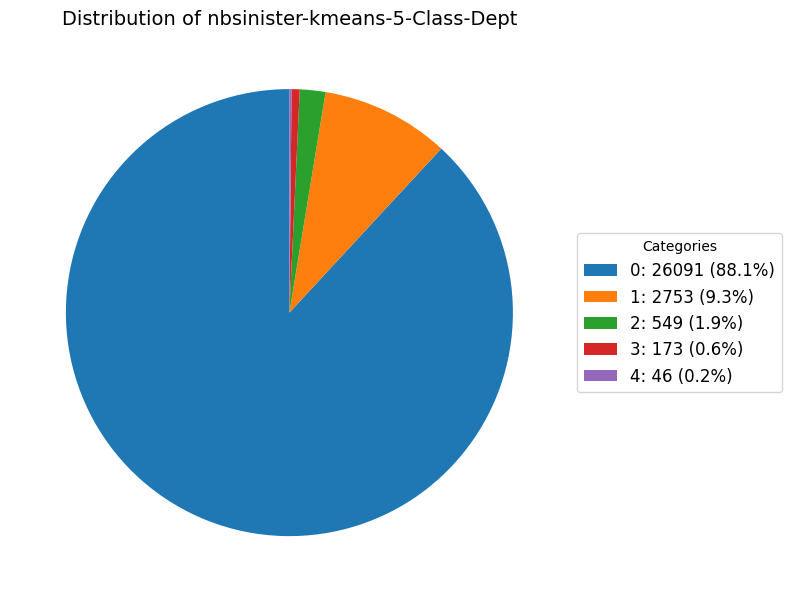

In [203]:
plot_pie_chart(df_test, 'nbsinister-kmeans-5-Class-Dept')

### Plotting

In [184]:
from GNN.graph_structure import *

def remove_bad_pixel(data, mask):
    nan_mask = np.isnan(data)  # Masque des NaN
    filled_raster = data.copy()  # Copie du tableau original

    nearest_indices = ndimage.distance_transform_edt(
        nan_mask,
        return_distances=False,
        return_indices=True
    )

    # Utiliser les indices pour remplir les NaN avec les valeurs les plus proches
    filled_raster = data.copy()
    filled_raster[nan_mask] = data[tuple(nearest_indices[:, nan_mask])]

    # Remettre à jour raster_node
    data = filled_raster
    data[np.isnan(mask)] = np.nan

    return data

In [197]:
from GNN.arborescence import *

target_ain = read_object('departement-01-ainInfluence.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'log' / '2x2')
target_doubs = read_object('departement-25-doubsInfluence.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'log' / '2x2')
target_yvelines = read_object('departement-78-yvelinesInfluence.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'log' / '2x2')
target_rhone = read_object('departement-69-rhoneInfluence.pkl', root_target / 'firepoint' / 'firemen' / 'occurence' / 'log' / '2x2')

target_ain = np.nansum(target_ain, axis=2)
target_doubs = np.nansum(target_doubs, axis=2)
target_yvelines = np.nansum(target_yvelines, axis=2)
target_rhone = np.nansum(target_rhone, axis=2)

population_ain = read_object('population.pkl', rootDisk / 'csv' / 'departement-01-ain' / 'raster' / '2x2')
population_doubs = read_object('population.pkl', rootDisk / 'csv' / 'departement-25-doubs' / 'raster' / '2x2')
population_yvelines = read_object('population.pkl', rootDisk / 'csv' / 'departement-78-yvelines' / 'raster' / '2x2')
population_rhone = read_object('population.pkl', rootDisk / 'csv' / 'departement-69-rhone' / 'raster' / '2x2')

target_ain[np.isnan(population_ain)] = np.nan
target_doubs[np.isnan(population_doubs)] = np.nan
target_yvelines[np.isnan(population_yvelines)] = np.nan
target_rhone[np.isnan(population_rhone)] = np.nan

dir_scale = Path('firemen2/firepoint/2x2/train/raster')

scale4_ain = read_object('pred_departement-01-ain_4_no_background_watershed.pkl', dir_scale)
scale4_doubs = read_object('pred_departement-25-doubs_4_no_background_watershed.pkl', dir_scale)
scale4_yvelines = read_object('pred_departement-78-yvelines_4_no_background_watershed.pkl', dir_scale)
scale4_rhone = read_object('pred_departement-69-rhone_4_no_background_watershed.pkl', dir_scale)

scale7_ain = read_object('pred_departement-01-ain_7_no_background_watershed.pkl', dir_scale)
scale7_doubs = read_object('pred_departement-25-doubs_7_no_background_watershed.pkl', dir_scale)
scale7_yvelines = read_object('pred_departement-78-yvelines_7_no_background_watershed.pkl', dir_scale)
scale7_rhone = read_object('pred_departement-69-rhone_7_no_background_watershed.pkl', dir_scale)

scale5_ain = read_object('pred_departement-01-ain_5_no_background_watershed.pkl', dir_scale)
scale5_doubs = read_object('pred_departement-25-doubs_5_no_background_watershed.pkl', dir_scale)
scale5_yvelines = read_object('pred_departement-78-yvelines_5_no_background_watershed.pkl', dir_scale)
scale5_rhone = read_object('pred_departement-69-rhone_5_no_background_watershed.pkl', dir_scale)

scale6_ain = read_object('pred_departement-01-ain_6_no_background_watershed.pkl', dir_scale)
scale6_doubs = read_object('pred_departement-25-doubs_6_no_background_watershed.pkl', dir_scale)
scale6_yvelines = read_object('pred_departement-78-yvelines_6_no_background_watershed.pkl', dir_scale)
scale6_rhone = read_object('pred_departement-69-rhone_6_no_background_watershed.pkl', dir_scale)

# Apply remove_bad_pixel to all scales for each department using the corresponding population data

# For department Ain
scale4_ain = remove_bad_pixel(scale4_ain, population_ain)
scale5_ain = remove_bad_pixel(scale5_ain, population_ain)
scale6_ain = remove_bad_pixel(scale6_ain, population_ain)
scale7_ain = remove_bad_pixel(scale7_ain, population_ain)

# For department Doubs
scale4_doubs = remove_bad_pixel(scale4_doubs, population_doubs)
scale5_doubs = remove_bad_pixel(scale5_doubs, population_doubs)
scale6_doubs = remove_bad_pixel(scale6_doubs, population_doubs)
scale7_doubs = remove_bad_pixel(scale7_doubs, population_doubs)

# For department Yvelines
scale4_yvelines = remove_bad_pixel(scale4_yvelines, population_yvelines)
scale5_yvelines = remove_bad_pixel(scale5_yvelines, population_yvelines)
scale6_yvelines = remove_bad_pixel(scale6_yvelines, population_yvelines)
scale7_yvelines = remove_bad_pixel(scale7_yvelines, population_yvelines)

# For department Rhone
scale4_rhone = remove_bad_pixel(scale4_rhone, population_rhone)
scale5_rhone = remove_bad_pixel(scale5_rhone, population_rhone)
scale6_rhone = remove_bad_pixel(scale6_rhone, population_rhone)
scale7_rhone = remove_bad_pixel(scale7_rhone, population_rhone)

dir_scale = Path('firemen2/firepoint/2x2/train/raster')

scale4_clustering_ain = read_object('pred_departement-01-ain_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_doubs = read_object('pred_departement-25-doubs_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_yvelines = read_object('pred_departement-78-yvelines_4_no_background_clustering.pkl', dir_scale)
scale4_clustering_rhone = read_object('pred_departement-69-rhone_4_no_background_clustering.pkl', dir_scale)

scale7_clustering_ain = read_object('pred_departement-01-ain_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_doubs = read_object('pred_departement-25-doubs_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_yvelines = read_object('pred_departement-78-yvelines_7_no_background_clustering.pkl', dir_scale)
scale7_clustering_rhone = read_object('pred_departement-69-rhone_7_no_background_clustering.pkl', dir_scale)

scale5_clustering_ain = read_object('pred_departement-01-ain_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_doubs = read_object('pred_departement-25-doubs_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_yvelines = read_object('pred_departement-78-yvelines_5_no_background_clustering.pkl', dir_scale)
scale5_clustering_rhone = read_object('pred_departement-69-rhone_5_no_background_clustering.pkl', dir_scale)

scale6_clustering_ain = read_object('pred_departement-01-ain_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_doubs = read_object('pred_departement-25-doubs_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_yvelines = read_object('pred_departement-78-yvelines_6_no_background_clustering.pkl', dir_scale)
scale6_clustering_rhone = read_object('pred_departement-69-rhone_6_no_background_clustering.pkl', dir_scale)

# For department Ain
scale4_clustering_ain = remove_bad_pixel(scale4_clustering_ain, population_ain)
scale5_clustering_ain = remove_bad_pixel(scale5_clustering_ain, population_ain)
scale6_clustering_ain = remove_bad_pixel(scale6_clustering_ain, population_ain)
scale7_clustering_ain = remove_bad_pixel(scale7_clustering_ain, population_ain)

# For dclustering_epartment Doubs
scale4_clustering_doubs = remove_bad_pixel(scale4_clustering_doubs, population_doubs)
scale5_clustering_doubs = remove_bad_pixel(scale5_clustering_doubs, population_doubs)
scale6_clustering_doubs = remove_bad_pixel(scale6_clustering_doubs, population_doubs)
scale7_clustering_doubs = remove_bad_pixel(scale7_clustering_doubs, population_doubs)

# For dclustering_epartment Yvelines
scale4_clustering_yvelines = remove_bad_pixel(scale4_clustering_yvelines, population_yvelines)
scale5_clustering_yvelines = remove_bad_pixel(scale5_clustering_yvelines, population_yvelines)
scale6_clustering_yvelines = remove_bad_pixel(scale6_clustering_yvelines, population_yvelines)
scale7_clustering_yvelines = remove_bad_pixel(scale7_clustering_yvelines, population_yvelines)

# For dclustering_epartment Rhone
scale4_clustering_rhone = remove_bad_pixel(scale4_clustering_rhone, population_rhone)
scale5_clustering_rhone = remove_bad_pixel(scale5_clustering_rhone, population_rhone)
scale6_clustering_rhone = remove_bad_pixel(scale6_clustering_rhone, population_rhone)
scale7_clustering_rhone = remove_bad_pixel(scale7_clustering_rhone, population_rhone)

import numpy as np

def sum_target_by_scale(target, scale, scale_id_column='id'):
    """
    Sum the target values for each unique scale ID.
    
    Parameters:
    - target: Array of target values (e.g., the fire distribution).
    - scale: Array representing the scale corresponding to each target value (e.g., scale4 or scale7).
    - scale_id_column: Name of the scale ID column (default is 'id').
    
    Returns:
    - summed_scale: Array where each pixel corresponds to the sum of target values for each unique scale ID.
    """
    # Ensure scale and target have the same shape
    if target.shape != scale.shape:
        raise ValueError("The target and scale arrays must have the same shape.")
    
    # Create an empty array to hold the summed values
    summed_scale = np.zeros_like(scale, dtype=float)
    
    # Iterate through each unique scale ID
    unique_ids = np.unique(scale[~np.isnan(scale)])
    
    for scale_id in unique_ids:
        # Find the pixels that correspond to the current scale ID
        mask = (scale == scale_id)
        
        # Sum the target values for the current scale ID
        summed_scale[mask] = np.sum(target[mask])
    
    summed_scale[np.isnan(scale)] = np.nan
    return summed_scale

# Apply to each scale
"""scale4_ain = sum_target_by_scale(target=target_ain, scale=scale4_ain)
scale4_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_doubs)
scale4_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_yvelines)
scale4_rhone = sum_target_by_scale(target=target_rhone, scale=scale4_rhone)

scale7_ain = sum_target_by_scale(target=target_ain, scale=scale7_ain)
scale7_doubs = sum_target_by_scale(target=target_doubs, scale=scale7_doubs)
scale7_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale7_yvelines)
scale7_rhone = sum_target_by_scale(target=target_rhone, scale=scale7_rhone)

scale4_clustering_ain = sum_target_by_scale(target=target_ain, scale=scale4_clustering_ain)
scale4_clustering_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_clustering_doubs)
scale4_clustering_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_clustering_yvelines)
scale4_clustering_rhone = sum_target_by_scale(target=target_rhone, scale=scale4_clustering_rhone)

scale7_clustering_ain = sum_target_by_scale(target=target_ain, scale=scale7_clustering_ain)
scale7_clustering_doubs = sum_target_by_scale(target=target_doubs, scale=scale7_clustering_doubs)
scale7_clustering_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale7_clustering_yvelines)
scale7_clustering_rhone = sum_target_by_scale(target=target_rhone, scale=scale7_clustering_rhone)"""

# Optionally, replace the original variables with the new summed scales
# This will make the scale arrays hold the summed target values


'scale4_ain = sum_target_by_scale(target=target_ain, scale=scale4_ain)\nscale4_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_doubs)\nscale4_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_yvelines)\nscale4_rhone = sum_target_by_scale(target=target_rhone, scale=scale4_rhone)\n\nscale7_ain = sum_target_by_scale(target=target_ain, scale=scale7_ain)\nscale7_doubs = sum_target_by_scale(target=target_doubs, scale=scale7_doubs)\nscale7_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale7_yvelines)\nscale7_rhone = sum_target_by_scale(target=target_rhone, scale=scale7_rhone)\n\nscale4_clustering_ain = sum_target_by_scale(target=target_ain, scale=scale4_clustering_ain)\nscale4_clustering_doubs = sum_target_by_scale(target=target_doubs, scale=scale4_clustering_doubs)\nscale4_clustering_yvelines = sum_target_by_scale(target=target_yvelines, scale=scale4_clustering_yvelines)\nscale4_clustering_rhone = sum_target_by_scale(target=target_rhone, scale=

In [198]:
data = {
    "ain": {
        "target": target_ain,
        "population": population_ain,
        "scale4": scale4_ain,
        "scale5": scale5_ain,
        "scale6": scale6_ain,
        "scale7": scale7_ain,
        "scale4_clustering": scale4_clustering_ain,
        "scale5_clustering": scale5_clustering_ain,
        "scale6_clustering": scale6_clustering_ain,
        "scale7_clustering": scale7_clustering_ain,
    },
    "doubs": {
        "target": target_doubs,
        "population": population_doubs,
        "scale4": scale4_doubs,
        "scale5": scale5_doubs,
        "scale6": scale6_doubs,
        "scale7": scale7_doubs,
        "scale4_clustering": scale4_clustering_doubs,
        "scale5_clustering": scale5_clustering_doubs,
        "scale6_clustering": scale6_clustering_doubs,
        "scale7_clustering": scale7_clustering_doubs,
    },
    "yvelines": {
        "target": target_yvelines,
        "population": population_yvelines,
        "scale4": scale4_yvelines,
        "scale5": scale5_yvelines,
        "scale6": scale6_yvelines,
        "scale7": scale7_yvelines,
        "scale4_clustering": scale4_clustering_yvelines,
        "scale5_clustering": scale5_clustering_yvelines,
        "scale6_clustering": scale6_clustering_yvelines,
        "scale7_clustering": scale7_clustering_yvelines,
    },
    "rhone": {
        "target": target_rhone,
        "population": population_rhone,
        "scale4": scale4_rhone,
        "scale5": scale5_rhone,
        "scale6": scale6_rhone,
        "scale7": scale7_rhone,
        "scale4_clustering": scale4_clustering_rhone,
        "scale5_clustering": scale5_clustering_rhone,
        "scale6_clustering": scale6_clustering_rhone,
        "scale7_clustering": scale7_clustering_rhone,
    }
}

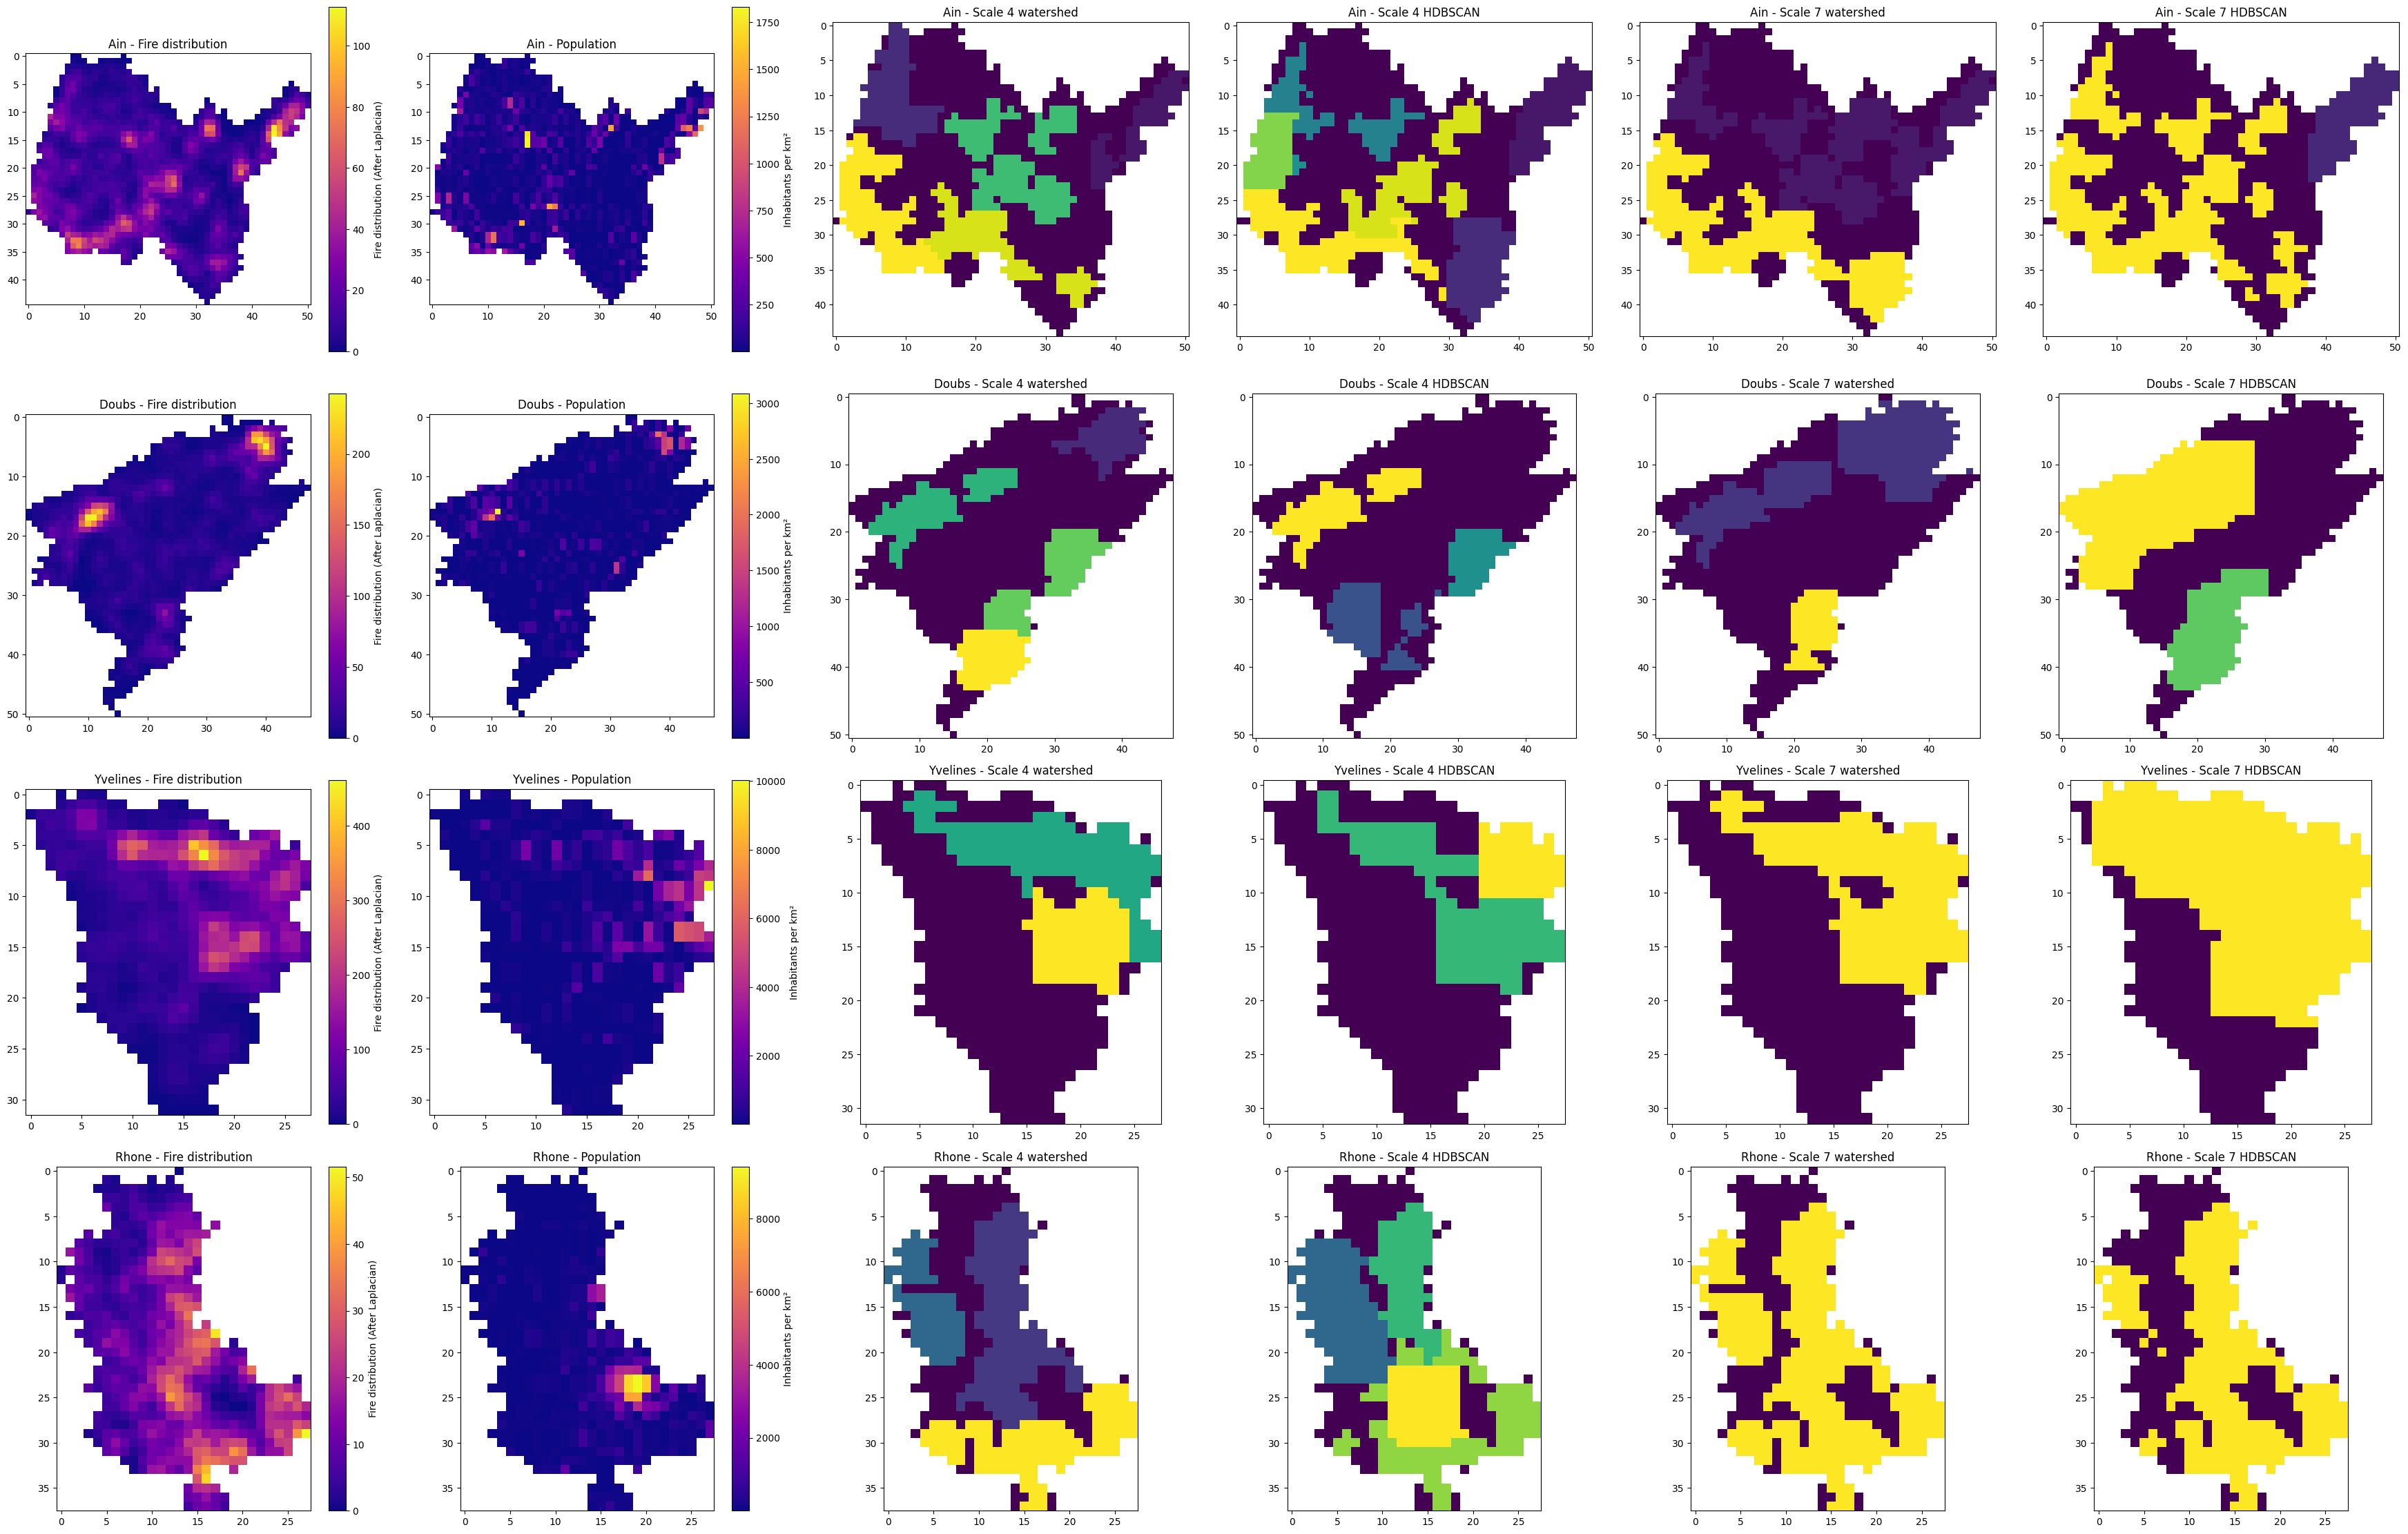

In [199]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_all_departments(data):
    """
    Plot Fire distribution (After Laplacian), Population, Scale4, and Scale7 for all departments in a single figure.

    Parameters:
    - data: Dictionary containing data for all departments.
    """
    departments = list(data.keys())
    num_departments = len(departments)

    # Create a figure with a grid for all departments (num_departments rows, 4 columns)
    fig, axes = plt.subplots(num_departments, 6, figsize=(35, 6 * num_departments))

    for i, department in enumerate(departments):
        # Extract department data
        dept_data = data[department]
        target = dept_data["target"]
        population = dept_data["population"]
        scale4 = dept_data["scale4"]
        scale7 = dept_data["scale7"]
        scale4_clustering = dept_data["scale4_clustering"]
        scale7_clustering = dept_data["scale7_clustering"]

        # Plot Fire distribution (After Laplacian) with colorbar
        im1 = axes[i, 0].imshow(target, cmap="plasma")  # Same cmap as population
        axes[i, 0].set_title(f"{department.capitalize()} - Fire distribution")
        cbar1 = plt.colorbar(im1, ax=axes[i, 0])
        cbar1.set_label('Fire distribution (After Laplacian)')

        # Plot Population with colorbar and units (inhabitants per km²)
        im2 = axes[i, 1].imshow(population, cmap="plasma")
        axes[i, 1].set_title(f"{department.capitalize()} - Population")
        cbar2 = plt.colorbar(im2, ax=axes[i, 1])
        cbar2.set_label('Inhabitants per km²')

        # Plot Scale4
        im3 = axes[i, 2].imshow(scale4)
        axes[i, 2].set_title(f"{department.capitalize()} - Scale 4 watershed")
        #cbar3 = plt.colorbar(im3, ax=axes[i, 2])
        #cbar3.set_label('Sum of fire distribution')

        # Plot Scale4_clustering
        im3 = axes[i, 3].imshow(scale4_clustering)
        axes[i, 3].set_title(f"{department.capitalize()} - Scale 4 HDBSCAN")
        #cbar5 = plt.colorbar(im3, ax=axes[i, 3])
        #cbar5.set_label('Sum of fire distribution')

        # Plot Scale7
        im4 = axes[i, 4].imshow(scale7)
        axes[i, 4].set_title(f"{department.capitalize()} - Scale 7 watershed")
        #cbar4 = plt.colorbar(im4, ax=axes[i, 4])
        #cbar4.set_label('Sum of fire distribution')

        # Plot Scale7_clustering
        im4 = axes[i, 5].imshow(scale7_clustering)
        axes[i, 5].set_title(f"{department.capitalize()} - Scale 7 HDBSCAN")
        #cbar6 = plt.colorbar(im4, ax=axes[i, 5])
        #cbar6.set_label('Sum of fire distribution')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Exemple d'utilisation
plot_all_departments(data)